# PROJECT 17: PREDICTING THE PRICE OF FLIGHT TICKET

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read train and test data
dftr =pd.read_excel('Ticket_Data_Train.xlsx', parse_dates=["Date_of_Journey"])
dfte=pd.read_excel('Ticket_Test_set.xlsx',parse_dates=["Date_of_Journey"])

In [3]:
#lets check the shape of train and test data
print('train data = ',dftr.shape)
print('test data = ',dfte.shape)


train data =  (10683, 11)
test data =  (2671, 10)


In [4]:
#Lets check the first five rows of train data
dftr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#Lets check the first five rows of test data
dfte.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
#remove duplicate rows in training dataset if any
dftr.drop_duplicates(keep='first',inplace=True)

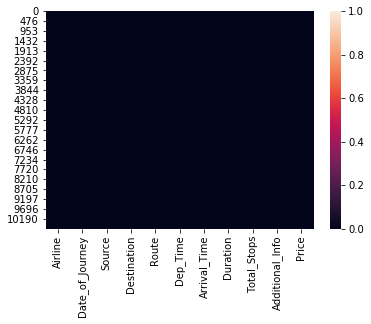

In [7]:
#Lets check the heatmap to see the missing values
sns.heatmap(dftr.isnull())

In [8]:
#Lets confirm the null values in train data
dftr.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#There is 1 missing value in route and 1 in total_stops, lets drop them
dftr.dropna(inplace=True)



In [10]:
#Lets check the null values in train data again
dftr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
#Lets see the missing values in test data
dfte.isnull().sum()
#There are no missing values in test data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

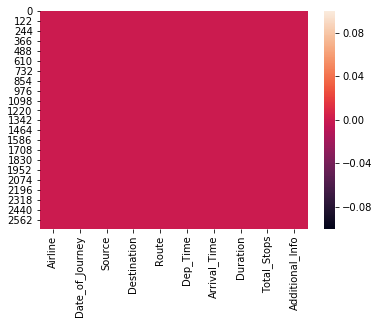

In [12]:
#Lets check the heatmap to see the missing values in test data
sns.heatmap(dfte.isnull())

In [13]:
#Lets process the  'Date_of_Journey' column in train data
dftr["month"]=dftr['Date_of_Journey'].dt.month
dftr["year"]=dftr['Date_of_Journey'].dt.year
dftr["day"]=dftr['Date_of_Journey'].dt.day_name()
dftr["day_of _month"] =dftr['Date_of_Journey'].dt.day


In [14]:
#Lets see the training data now
dftr.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,year,day,day_of _month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019,Sunday,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2019,Saturday,5


In [15]:
#Lets process the  'Date_of_Journey' column in test data
dfte["month"]=dfte['Date_of_Journey'].dt.month
dfte["year"]=dfte['Date_of_Journey'].dt.year
dfte["day"]=dfte['Date_of_Journey'].dt.day_name()
dfte["day_of _month"] =dfte['Date_of_Journey'].dt.day

In [16]:
#Lets see the test data now
dfte.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,month,year,day,day_of _month
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,2019,Thursday,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,2019,Thursday,5


In [17]:
#Lets create a column indicating weekend and weekday
dftr["type_of_day"]=np.where((dftr["day"]=="Sunday")|(dftr["day"]=="Saturday"),"weekend","weeekday")
dfte["type_of_day"]=np.where((dfte["day"]=="Sunday")|(dfte["day"]=="Saturday"),"weekend","weeekday")

In [18]:
#Lets drop the date of journey column as information present in it has been processed
dftr.drop('Date_of_Journey',axis=1,inplace=True)
dfte.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
#lets explore the year column in train data
dftr['year'].value_counts()

2019    10462
Name: year, dtype: int64

In [20]:
#Lets explore the year column in test data
dfte['year'].value_counts()

2019    2671
Name: year, dtype: int64

In [21]:
#All data is from only one year 2019, so lets drop it
dftr.drop('year',axis=1,inplace=True)
dfte.drop('year',axis=1,inplace=True)

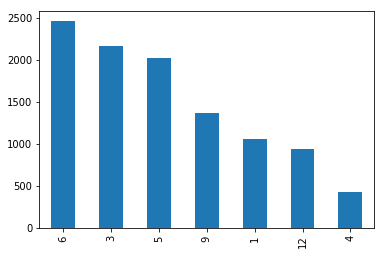

In [22]:
#Lets explore the month column in train data
dftr['month'].value_counts().plot.bar()
# we can see we have data of 7 months and highest data is from June


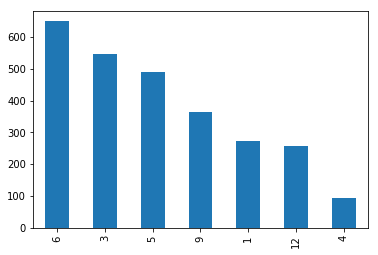

In [23]:
#Lets explore the month column in test data
dfte['month'].value_counts().plot.bar()


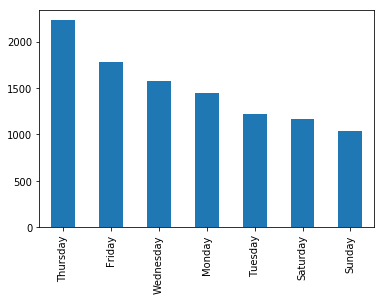

In [24]:
#Lets explore the day column in train data
dftr['day'].value_counts().plot.bar()
#  In the given data set we can see maximum flights are on thursday and least are on sunday

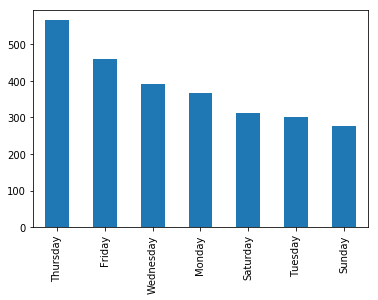

In [25]:
#Lets explore the day column in test data
dfte['day'].value_counts().plot.bar()
# we can see maximum flights are on thursday and least are on sunday

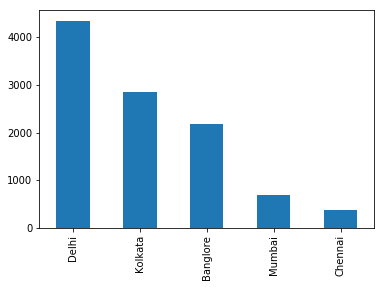

In [26]:
#Lets explore the source column in train data
dftr['Source'].value_counts().plot.bar()
# WE HAVE THE DATA OF 5 CITIES AND MAXIMUM FLIGHTS ARE FROM DELHI

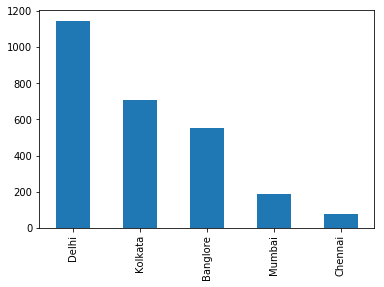

In [27]:
#Lets explore the source column in test data
dfte['Source'].value_counts().plot.bar()


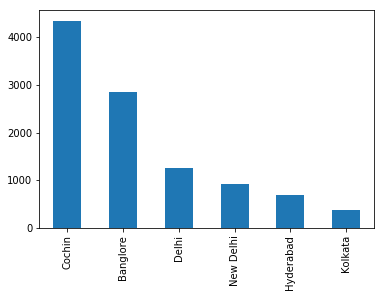

In [28]:
#Lets explore the destination column in train data
dftr['Destination'].value_counts().plot.bar()
#there are 6 destination in the train data 

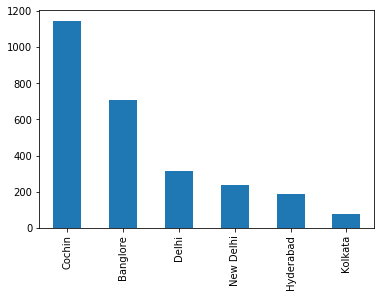

In [29]:
#Lets explore the destination column in test data
dfte['Destination'].value_counts().plot.bar()

In [30]:
#Lets explore the Total_Stops column in train data
dftr['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
#Lets replace the non-stop column with 0 stops
dftr['Total_Stops'].replace('non-stop','0 stop',inplace=True)
dfte['Total_Stops'].replace('non-stop','0 stop',inplace=True)

In [32]:
#Lets extract the number of stops information from it
stop=dftr['Total_Stops'].str.split(' ',expand=True)
stopt=dfte['Total_Stops'].str.split(' ',expand=True)
                                    

In [33]:
#Lets create a column having numeric info about stop
dftr['Number_of_Stops'] = stop[0].astype(int)
dfte['Number_of_Stops'] = stopt[0].astype(int)

In [34]:
#Lets drop total_stops column
dftr.drop('Total_Stops',axis=1,inplace=True)
dfte.drop('Total_Stops',axis=1,inplace=True)

In [35]:
#Lets explore additional info column in train data
dftr['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

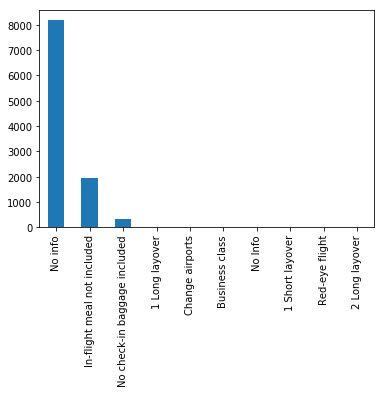

In [36]:
#Lets explore additional info column in train data
dftr['Additional_Info'].value_counts().plot.bar()

In [37]:
#Lets see the additional info in test data
dfte['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [38]:
#Lets extract the information from duration column in train data
duration= dftr['Duration'].str.split('h',expand=True)
# lETS create a new column
dftr['Duration_hour']=duration[0]
#There is a column which has duration of 5m having index 6474
#Lets drop this row
dftr.drop(6474,inplace=True)
#Lets convert duration hour into integer
dftr['Duration_hour']=dftr['Duration_hour'].astype(int)
#Lets  extract the minute portion of it
durn = duration[1].str.split('m',expand=True)
#Lets convert it into integer
dftr['Duration_min']=durn[0]
dftr['Duration_min'] = dftr['Duration_min'].replace('',0)
dftr['Duration_min']= dftr['Duration_min'].astype(int)
#Lets create a new column having total time in minutes
dftr['Total_Duration_min']= dftr['Duration_hour']*60+ dftr['Duration_min']


In [39]:
#Lets drop the unneccesary column
dftr.drop(['Duration','Duration_hour','Duration_min'],axis=1,inplace=True)

In [40]:
#Lets checkk the first five rows of data
dftr.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,month,day,day_of _month,type_of_day,Number_of_Stops,Total_Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,No info,3897,3,Sunday,24,weekend,0,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,No info,7662,1,Saturday,5,weekend,2,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,No info,13882,9,Friday,6,weeekday,2,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,No info,6218,12,Thursday,5,weeekday,1,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,No info,13302,1,Thursday,3,weeekday,1,285


In [41]:
#Lets extract the information from duration column in test data
durationt= dfte['Duration'].str.split('h',expand=True)
# lETS create a new column
dfte['Duration_hour']=durationt[0]
#There is a column which has duration of 5m having index 2660
#Lets drop this row
dfte.drop(2660,inplace=True)
#Lets convert duration hour into integer
dfte['Duration_hour']=dfte['Duration_hour'].astype(int)
#Lets  extract the minute portion of it
durnt = durationt[1].str.split('m',expand=True)
#Lets convert it into integer
dfte['Duration_min']=durnt[0]
dfte['Duration_min'] = dfte['Duration_min'].replace('',0)
dfte['Duration_min']= dfte['Duration_min'].astype(int)
#Lets create a new column having total time in minutes
dfte['Total_Duration_min']= dfte['Duration_hour']*60+ dfte['Duration_min']


In [42]:
#Lets drop the unneccesary column
dfte.drop(['Duration','Duration_hour','Duration_min'],axis=1,inplace=True)

In [43]:
#Lets explore the test dat
dfte.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,month,day,day_of _month,type_of_day,Number_of_Stops,Total_Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,No info,6,Thursday,6,weeekday,1,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,No info,12,Thursday,5,weeekday,1,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,In-flight meal not included,5,Tuesday,21,weeekday,1,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,No info,5,Tuesday,21,weeekday,1,780
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,No info,6,Monday,24,weeekday,0,170


In [44]:
# Let us  do Cleaning  of Departure and Arrival Times in train data and test data

dftr['Depart_Time_Hour'] = pd.to_datetime(dftr.Dep_Time).dt.hour
dftr['Depart_Time_Minutes'] = pd.to_datetime(dftr.Dep_Time).dt.minute
dftr.drop('Dep_Time', axis = 1, inplace = True)
dftr['Arr_Time_Hour'] = pd.to_datetime(dftr.Arrival_Time).dt.hour
dftr['Arr_Time_Minutes'] = pd.to_datetime(dftr.Arrival_Time).dt.minute
dftr.drop('Arrival_Time', axis = 1, inplace = True)

dfte['Depart_Time_Hour'] = pd.to_datetime(dfte.Dep_Time).dt.hour
dfte['Depart_Time_Minutes'] = pd.to_datetime(dfte.Dep_Time).dt.minute
dfte.drop('Dep_Time', axis = 1, inplace = True)
dfte['Arr_Time_Hour'] = pd.to_datetime(dfte.Arrival_Time).dt.hour
dfte['Arr_Time_Minutes'] = pd.to_datetime(dfte.Arrival_Time).dt.minute
dfte.drop('Arrival_Time', axis = 1, inplace = True)


In [45]:
#LETS CREATE A NEW COLUM HAVING BINS FROM DEPARTURE TIME
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['Past Midnight','Too early morning','early morning','morning','early afternoon','afternoon','evening','night']
dftr['part_of_day'] = pd.cut(dftr['Depart_Time_Hour'], bins=bins, labels=labels)
dfte['part_of_day'] = pd.cut(dfte['Depart_Time_Hour'], bins=bins, labels=labels)

dftr['part_of_day'] = dftr['part_of_day'].astype('category')
dfte['part_of_day'] = dfte['part_of_day'].astype('category')




In [46]:
#Lets see the first five rows of train data
dftr.head()

,Airline,Source,Destination,Route,Additional_Info,Price,month,day,day_of _month,type_of_day,Number_of_Stops,Total_Duration_min,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,part_of_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,3,Sunday,24,weekend,0,170,22,20,1,10,night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,Saturday,5,weekend,2,445,5,50,13,15,Too early morning
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,Friday,6,weeekday,2,1140,9,25,4,25,early morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,Thursday,5,weeekday,1,325,18,5,23,30,afternoon
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,Thursday,3,weeekday,1,285,16,50,21,35,afternoon


In [47]:
#Lets see the first five rows of test data
dfte.head()

,Airline,Source,Destination,Route,Additional_Info,month,day,day_of _month,type_of_day,Number_of_Stops,Total_Duration_min,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,part_of_day
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,No info,6,Thursday,6,weeekday,1,655,17,30,4,25,afternoon
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,No info,12,Thursday,5,weeekday,1,240,6,20,10,20,Too early morning
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,In-flight meal not included,5,Tuesday,21,weeekday,1,1425,19,15,19,0,evening
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,No info,5,Tuesday,21,weeekday,1,780,8,0,21,0,early morning
4,Air Asia,Banglore,Delhi,BLR → DEL,No info,6,Monday,24,weeekday,0,170,23,55,2,45,night


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CE64FA48D0>,
      dtype=object)

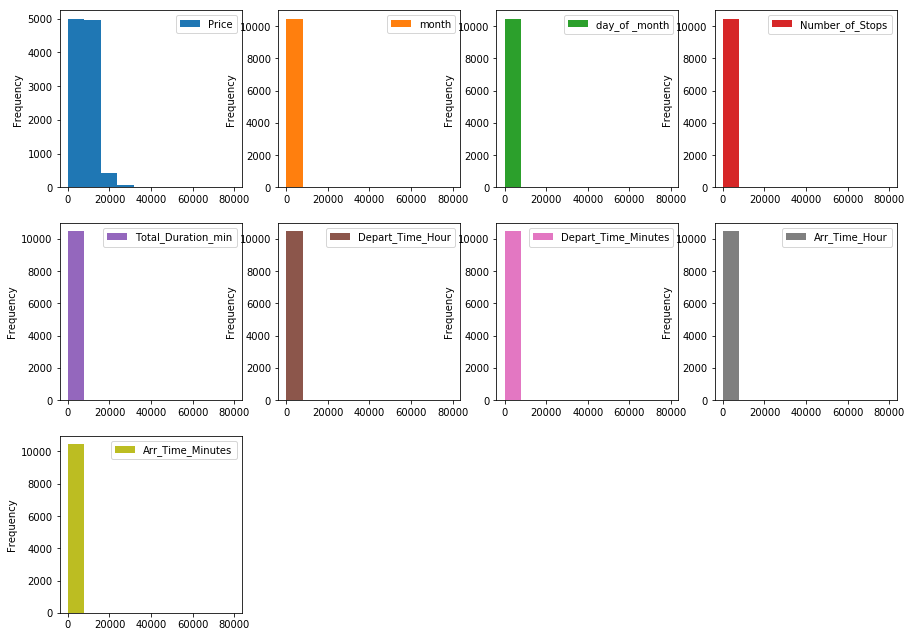

In [48]:
# Lets see the distribution of numeric data
dftr.plot(kind='hist', subplots=True, layout=(4,4),sharex=False,sharey=False,figsize=(15,15))
#There is skewness presence in the few variables which we will soon deal with

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CE64FA4EF0>,
      dtype=object)

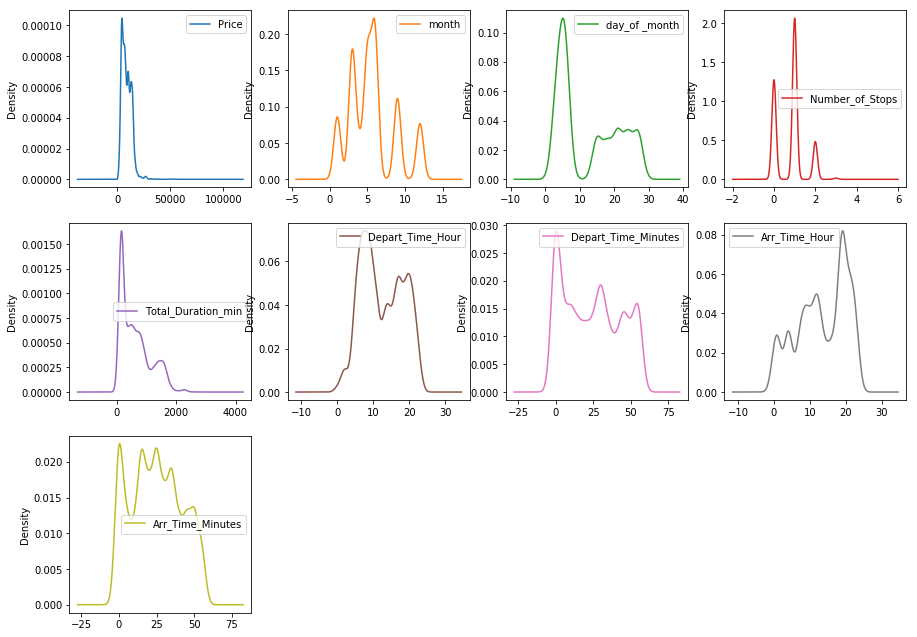

In [49]:
#Lets see the density plot of numeric data
dftr.plot(kind='density', subplots=True, layout=(4,4),sharex=False,sharey=False,figsize=(15,15))

Price                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
month                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
day_of _month           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Number_of_Stops         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Total_Duration_min        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Depart_Time_Hour       AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Depart_Time_Minutes    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Arr_Time_Hour          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Arr_Time_Minutes          AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

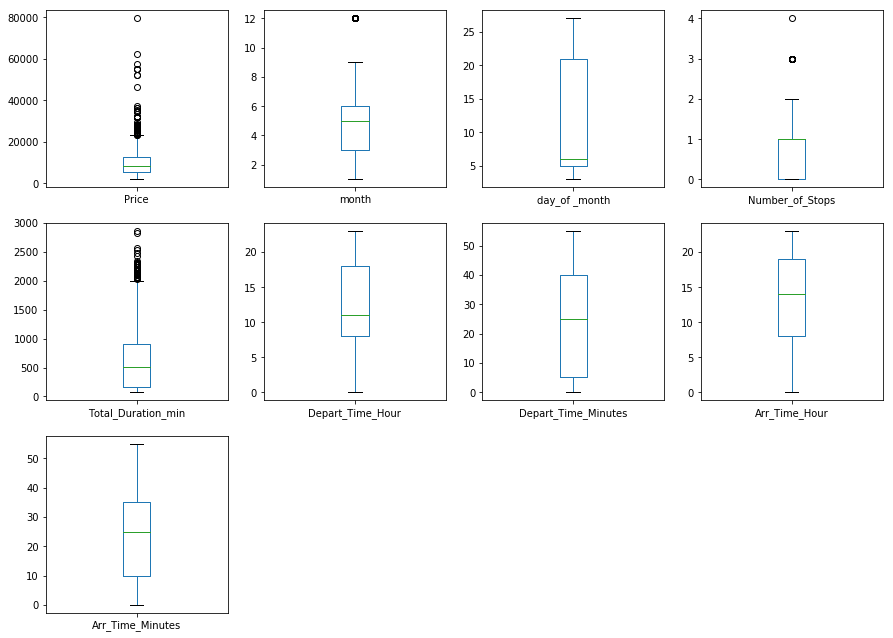

In [50]:
#Lets see the box plot of numeric features

dftr.plot(kind='box', subplots=True, layout=(4,4),sharex=False,sharey=False,figsize=(15,15))
# we can see the presence of outliers in few variables which we will deal soon

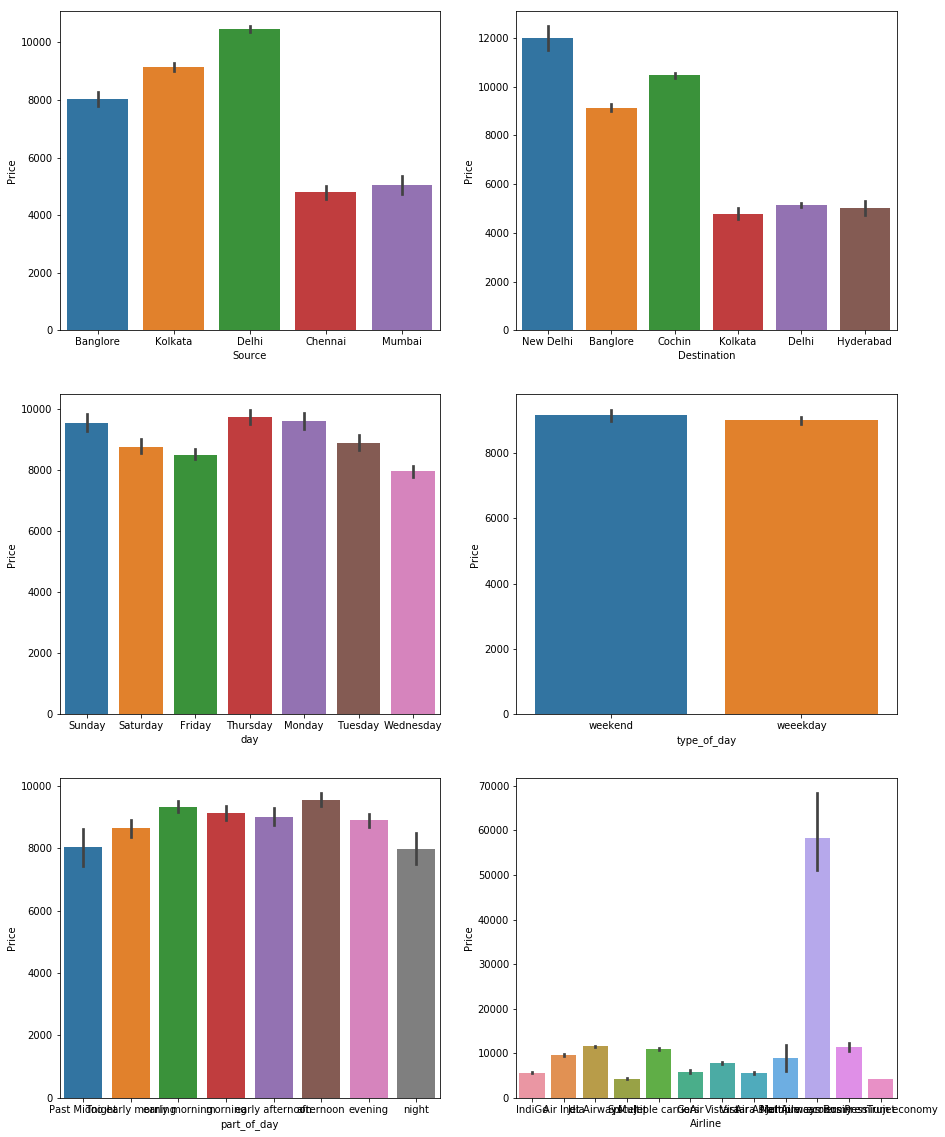

In [51]:
#Lets see the relation between price and categorical variables
f,axes= plt.subplots(3,2, figsize=(15,20))
sns.barplot(x='Airline', y ='Price', data=dftr,ax=axes[2,1])
sns.barplot(x='Destination', y ='Price', data=dftr, ax=axes[0,1])
sns.barplot(x='day', y ='Price', data=dftr, ax=axes[1,0])
sns.barplot(x='type_of_day', y ='Price', data=dftr, ax=axes[1,1])
sns.barplot(x='part_of_day', y ='Price', data=dftr, ax=axes[2,0])
sns.barplot(x='Source', y ='Price', data=dftr, ax=axes[0,0])


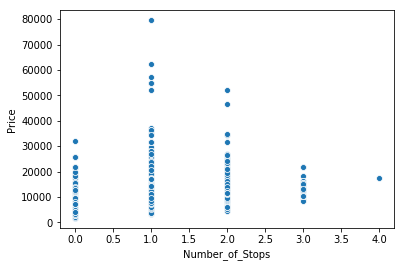

In [52]:
#Lets see the relation between number of stops and price
sns.scatterplot(x='Number_of_Stops',y='Price', data=dftr)

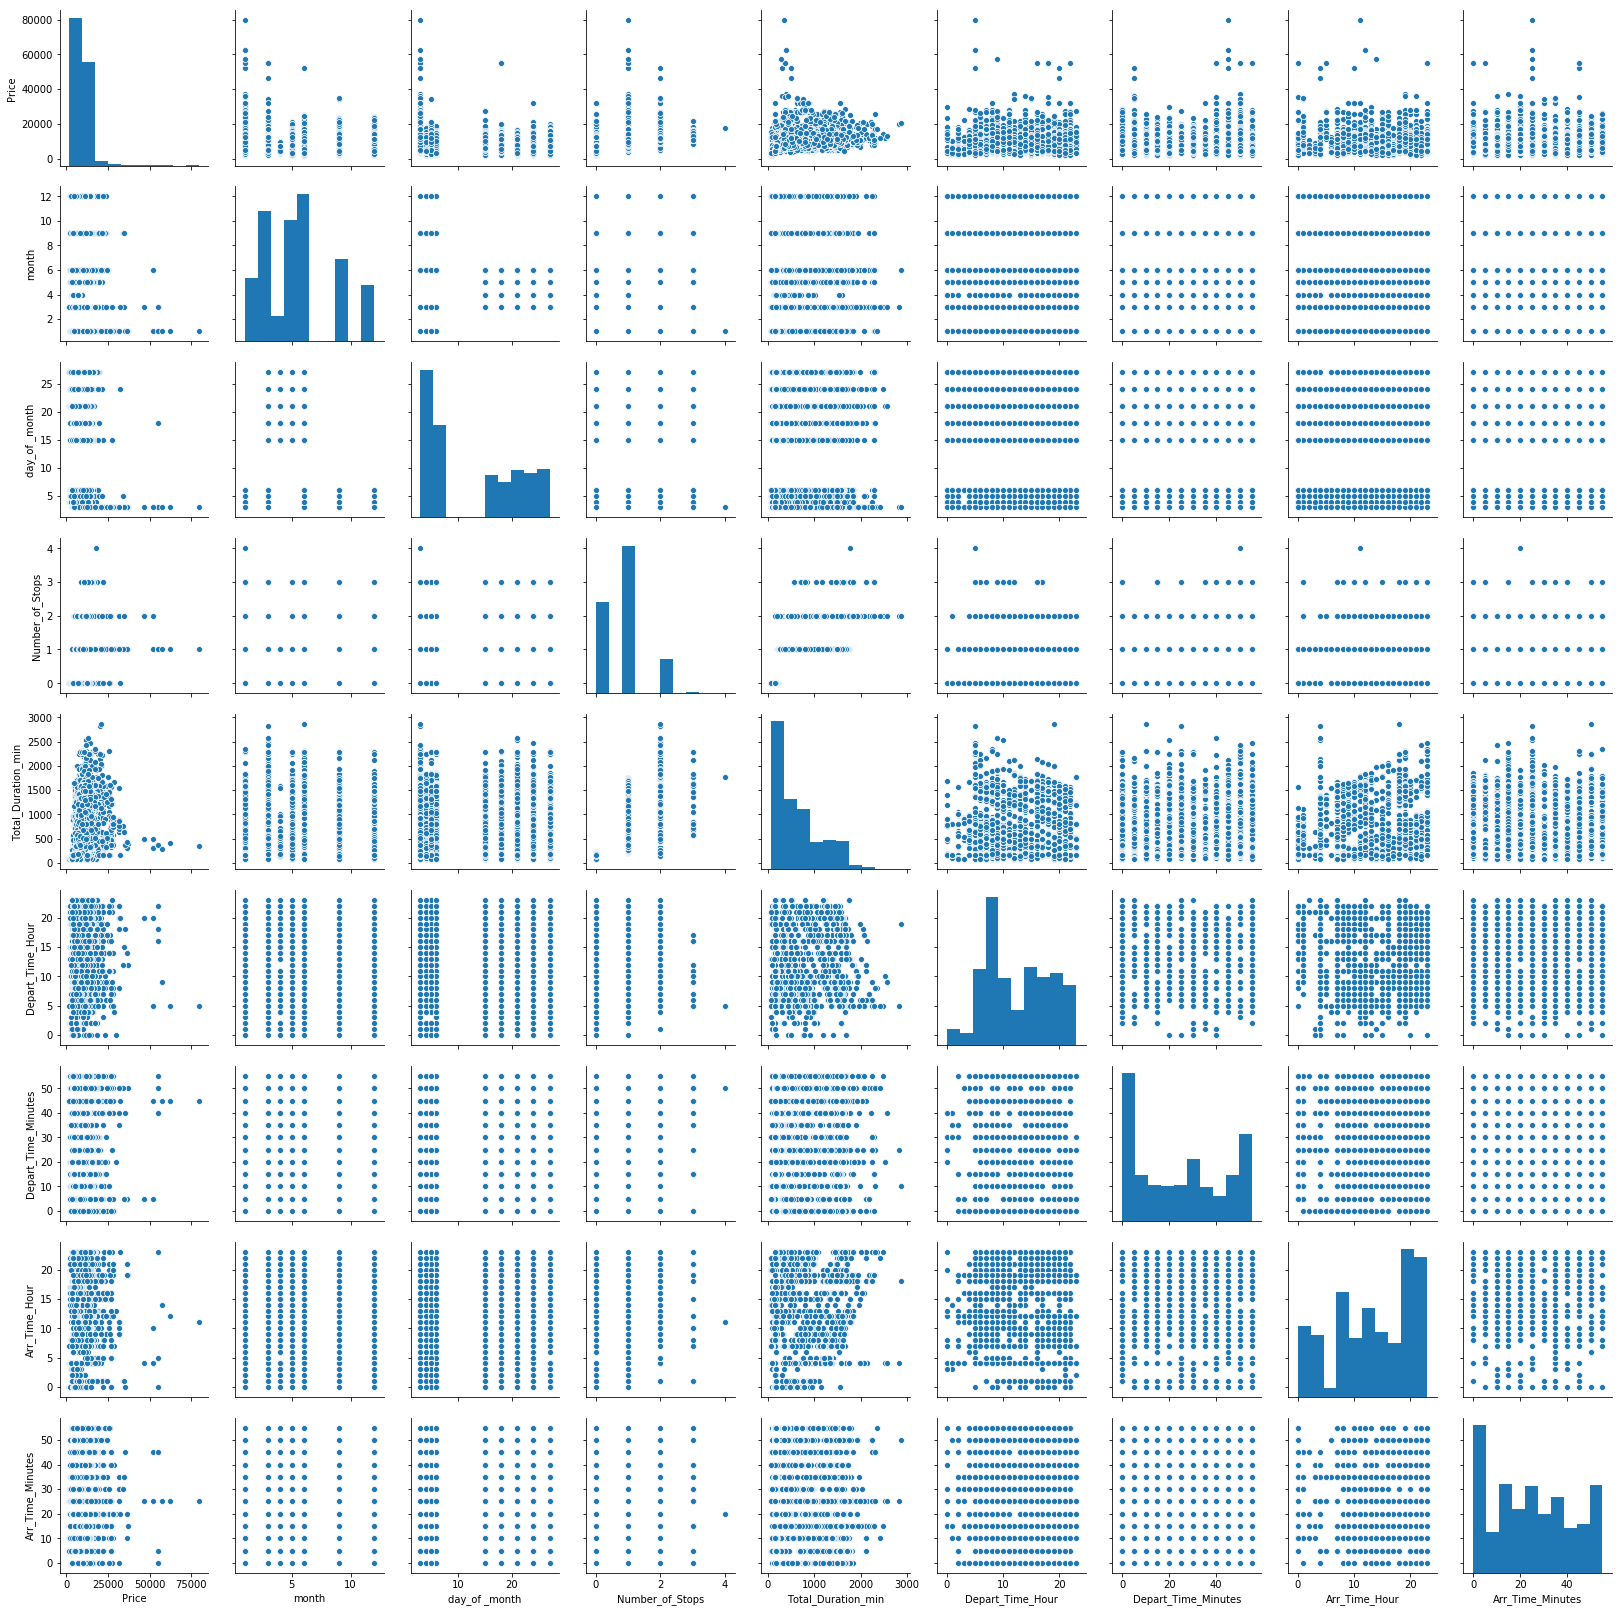

In [53]:
#Lets see the relation between all variables
sns.pairplot(dftr)

In [54]:
#Lets check the skewness in  train data
dftr.skew()

Price                  1.858221
month                  0.630898
day_of _month          0.375849
Number_of_Stops        0.332400
Total_Duration_min     0.903960
Depart_Time_Hour       0.108461
Depart_Time_Minutes    0.171488
Arr_Time_Hour         -0.378863
Arr_Time_Minutes       0.110791
dtype: float64

In [55]:
#Lets reduce positive skewness in train data 
colm = ['Price','month','Total_Duration_min']
for i in colm:
    dftr[i]= np.log1p(dftr[i])


In [56]:
#Lets check the skewness  again in train  data
dftr.skew()

Price                 -0.228067
month                 -0.526255
day_of _month          0.375849
Number_of_Stops        0.332400
Total_Duration_min    -0.139555
Depart_Time_Hour       0.108461
Depart_Time_Minutes    0.171488
Arr_Time_Hour         -0.378863
Arr_Time_Minutes       0.110791
dtype: float64

In [57]:
#Lets check the skewness in test data
dfte.skew()

month                  0.590939
day_of _month          0.477710
Number_of_Stops        0.321839
Total_Duration_min     0.896077
Depart_Time_Hour       0.094352
Depart_Time_Minutes    0.129241
Arr_Time_Hour         -0.442742
Arr_Time_Minutes       0.115257
dtype: float64

In [58]:
#Lets reduce positive skewness in test data 
colm1 = ['month','Total_Duration_min']
for i in colm1:
    dfte[i]= np.log1p(dfte[i])

In [59]:
#Lets check the skewness again in test data
dfte.skew()

month                 -0.542840
day_of _month          0.477710
Number_of_Stops        0.321839
Total_Duration_min    -0.185402
Depart_Time_Hour       0.094352
Depart_Time_Minutes    0.129241
Arr_Time_Hour         -0.442742
Arr_Time_Minutes       0.115257
dtype: float64

In [60]:
# Lets remove the outliers if any in train data
from scipy.stats import zscore
colm2 = dftr[['Price','month','day_of _month','Number_of_Stops','Total_Duration_min', 'Depart_Time_Hour', 'Depart_Time_Minutes',
       'Arr_Time_Hour', 'Arr_Time_Minutes']]
z_score =abs(zscore(colm2))
dfx = dftr.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', dftr.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which have been removed

The shape of original dataframe was = (10461, 17)
The shape of dataframe after removing outliers is = (10408, 17)


In [61]:
#Lets do dummy encoding for 'Source',destination,type of day,day and part of day
dfx = pd.get_dummies(dfx,columns=['Source','Destination','type_of_day','part_of_day','day'],drop_first=True)
dfte = pd.get_dummies(dfte,columns=['Source','Destination','type_of_day','part_of_day','day'],drop_first=True)

In [62]:
#Lets Label encode the Route,Additonal info
from sklearn.preprocessing import LabelEncoder
encode = ['Airline','Route','Additional_Info']
le=LabelEncoder()
for i in encode:
    dfx[i]=le.fit_transform(dfx[i])
    dfte[i]=le.fit_transform(dfte[i])

In [63]:
#Lets see the train data
dfx.head()

,Airline,Route,Additional_Info,Price,month,day_of _month,Number_of_Stops,Total_Duration_min,Depart_Time_Hour,Depart_Time_Minutes,...,part_of_day_early afternoon,part_of_day_afternoon,part_of_day_evening,part_of_day_night,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,3,15,8,8.268219,1.386294,24,0,5.141664,22,20,...,0,0,0,1,0,0,1,0,0,0
1,1,73,8,8.944159,0.693147,5,2,6.100319,5,50,...,0,0,0,0,0,1,0,0,0,0
2,4,106,8,9.538420,2.302585,6,2,7.039660,9,25,...,0,0,0,0,0,0,0,0,0,0
3,3,80,8,8.735364,2.564949,5,1,5.786897,18,5,...,0,1,0,0,0,0,0,1,0,0
4,3,23,8,9.495745,0.693147,3,1,5.655992,16,50,...,0,1,0,0,0,0,0,1,0,0


In [64]:
#Lets see the test data
dfte.head()

,Airline,Route,Additional_Info,month,day_of _month,Number_of_Stops,Total_Duration_min,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,...,part_of_day_early afternoon,part_of_day_afternoon,part_of_day_evening,part_of_day_night,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,4,75,5,1.945910,6,1,6.486161,17,30,4,...,0,1,0,0,0,0,0,1,0,0
1,3,64,5,2.564949,5,1,5.484797,6,20,10,...,0,0,0,0,0,0,0,1,0,0
2,4,75,3,1.791759,21,1,7.262629,19,15,19,...,0,0,1,0,0,0,0,0,1,0
3,6,75,5,1.791759,21,1,6.660575,8,0,21,...,0,0,0,0,0,0,0,0,1,0
4,0,16,5,1.945910,24,0,5.141664,23,55,2,...,0,0,0,1,1,0,0,0,0,0


In [65]:
#Lets check the shape of both the train and test dat
print('shape of train data {}'.format(dfx.shape))
print('shape of test data {}'.format(dfte.shape))

shape of train data (10408, 35)
shape of test data (2670, 34)


In [66]:
#Now lets seperate features and target
xtrain=dfx.drop('Price',axis=1)
ytrain=dfx[['Price']]

In [67]:
#Lets see the first five rows of features
xtrain.head()

,Airline,Route,Additional_Info,month,day_of _month,Number_of_Stops,Total_Duration_min,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,...,part_of_day_early afternoon,part_of_day_afternoon,part_of_day_evening,part_of_day_night,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,3,15,8,1.386294,24,0,5.141664,22,20,1,...,0,0,0,1,0,0,1,0,0,0
1,1,73,8,0.693147,5,2,6.100319,5,50,13,...,0,0,0,0,0,1,0,0,0,0
2,4,106,8,2.302585,6,2,7.039660,9,25,4,...,0,0,0,0,0,0,0,0,0,0
3,3,80,8,2.564949,5,1,5.786897,18,5,23,...,0,1,0,0,0,0,0,1,0,0
4,3,23,8,0.693147,3,1,5.655992,16,50,21,...,0,1,0,0,0,0,0,1,0,0


In [68]:
#Lets see the first five rows of target
ytrain.head()

,Price
0,8.268219
1,8.944159
2,9.538420
3,8.735364
4,9.495745


In [69]:
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [70]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso(random_state=5))])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge(random_state=5))])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(random_state=5))])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

In [71]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, xtrain, ytrain, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -0.097533 (0.006199)
Lasso: -0.261727 (0.009028)
Ridge: -0.096298 (0.004659)
EN: -0.261727 (0.009028)
DT: -0.025389 (0.002911)
SVR: -0.041226 (0.003289)
KNN: -0.071872 (0.006137)


In [72]:
#Let us check which model will perform well on the given data on the basis of mean crossval r2score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='r2') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.626924 (0.022043)
Lasso: -0.000833 (0.000957)
Ridge: 0.631476 (0.019534)
EN: -0.000833 (0.000957)
DT: 0.902741 (0.012486)
SVR: 0.842011 (0.015720)
KNN: 0.724661 (0.027870)


In [73]:
#Lets create a comparison
Comparison = pd.DataFrame({'ModelName':names,'R2_score': results,'NMSE':results1})
Comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
4,DT,0.902741,-0.025389
5,SVR,0.842011,-0.041226
6,KNN,0.724661,-0.071872
2,Ridge,0.631476,-0.096298
0,LR,0.626924,-0.097533
1,Lasso,-0.000833,-0.261727
3,EN,-0.000833,-0.261727


In [74]:
#Lets see if ensemble technique can perform better
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostRegressor(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingRegressor(random_state=5))])))

In [75]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of NMSE

results2 = []
names2 = []
for name, model in pipelines1: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, xtrain, ytrain, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2.mean()) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)

RF: -0.016875 (0.001952)
ADC: -0.081450 (0.002789)
GBC: -0.032333 (0.002099)


In [76]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of r2 score
results3 = []
names3 = []
for name, model in pipelines1: 
    kfold3 = KFold(n_splits=10, random_state=1) 
    cv_results3 = cross_val_score(model, xtrain, ytrain, cv=kfold3, scoring='r2') 
    results3.append(cv_results3.mean()) 
    names3.append(name) 
    msg3 = "%s: %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg3) 

RF: 0.935381 (0.007912)
ADC: 0.688319 (0.011583)
GBC: 0.876177 (0.009774)


In [77]:
#Lets see the comparison between ensemble techniques
Comparison2 = pd.DataFrame({'ModelName':names2,'R2_score': results3,'NMSE':results2})
Comparison2.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
0,RF,0.935381,-0.016875
2,GBC,0.876177,-0.032333
1,ADC,0.688319,-0.081450


In [78]:
#Lets see the comparison between all the basic and ensemble techniques
final_comparison =pd.concat([Comparison,Comparison2])
final_comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
0,RF,0.935381,-0.016875
4,DT,0.902741,-0.025389
2,GBC,0.876177,-0.032333
5,SVR,0.842011,-0.041226
6,KNN,0.724661,-0.071872
1,ADC,0.688319,-0.081450
2,Ridge,0.631476,-0.096298
0,LR,0.626924,-0.097533
1,Lasso,-0.000833,-0.261727
3,EN,-0.000833,-0.261727


In [79]:
#Lets create kfold
kfoldx = KFold(n_splits=10, random_state=1)

In [80]:
#Lets try to check if  cross val performance of Random Forest can be increased by tuning parameters
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(xtrain)
scXtrain = scaler.transform(xtrain)

param_grid = {'n_estimators': [10,25,50,100,200,300],'max_features': [2,4,6,8,10],'min_samples_split': [2,3,4], 'min_samples_leaf':[1,2]}
mod = RandomForestRegressor(random_state=5)
grid = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='r2', cv=kfoldx,n_jobs=-1,verbose=True)
grid_result = grid.fit(scXtrain, ytrain)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 16.5min finished


In [81]:
#Lets see the best score
grid_result.best_score_


0.9401850738467259

In [82]:
#Lets see the best parameters
grid_result.best_params_

{'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [83]:
#Lets see the best estimator
grid_result.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=None, oob_score=False, random_state=5,
           verbose=0, warm_start=False)

In [84]:
# lETS CHECK ITS KFOLD CROSS VAL NMSE AND R2 SCORE
modelf=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=None, oob_score=False, random_state=5,
           verbose=0, warm_start=False)
print('KFOLD Cross val nmse = ',cross_val_score(modelf,scXtrain,ytrain,cv=kfoldx,scoring="neg_mean_squared_error").mean())
print('KFOLD Cross val R2 = ',cross_val_score(modelf,scXtrain,ytrain,cv=kfoldx,scoring="r2").mean())

KFOLD Cross val nmse =  -0.015626016644667538
KFOLD Cross val R2 =  0.9401843913626993


In [85]:
#Lets implement the model using best parameters
RFR = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=None, oob_score=False, random_state=5,
           verbose=0, warm_start=False)
sc = StandardScaler()
X_train= sc.fit_transform(xtrain)
X_test= sc.transform(dfte)
RFR.fit(X_train,ytrain)
ypred=RFR.predict(X_test)


In [86]:
#As we have taken the log1p of fee colum to reduce skewness, we have to reverse the operation to get actual predicted values
ypredx=np.expm1(ypred)

In [87]:
# Lets save the predicted result to a excel file
dfpr = pd.DataFrame(ypredx,columns=['Price'])
dfpr.to_csv('RF_PRICE_prediction.csv')

In [88]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(RFR,'RFR_TICKET_PRED.pkl')

['RFR_TICKET_PRED.pkl']